# Inferential Statistics Ib - Frequentism

## Learning objectives

This assignment takes you on a brief journey through frequentist statistics. You will explore
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

For working through this notebook, you are expected to have an understanding of:
* the idea of a random variable
* what a probability density function (pdf) is
* and the cumulative density function
* what the Normal distribution is at a high level

It will be helpful if you are familiar with the concept of a sampling distribution, but this assignment will introduce this and give you hands on experience. As such, this notebook will take you from a basic understanding of random variables, and probability and bridge the gap to applying it in Python before moving on to a real world application.

In the previous notebook, we used only data from a known normal distribution. Now we tackle real data, rather than simulated data, and look at answering some relevant real-world business problems from the data.

## Hospital medical charges

You're now in the position of a data analyst working for a hospital. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. The next few assignment notebooks are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the following assignment notebook you'll use bootstrapping to test that assumption. And in the final notebook you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
import seaborn as sns
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

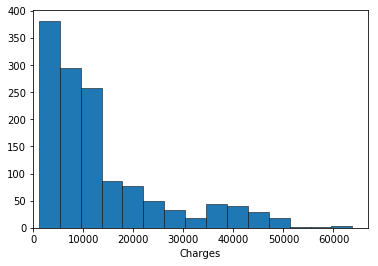

The mean is:  13270.42, and the standard deviation is:  12105.48


In [4]:
#sns.set()
plt.hist(medical['charges'], edgecolor = 'black', linewidth = 0.5, bins = 15)
plt.xlabel('Charges')
plt.xlim(left = 0)
plt.show()

mean = np.mean(medical['charges'])
std = np.std(medical['charges'])
print('The mean is: % 8.2f, and the standard deviation is: % 5.2f' %(mean, std))

In [5]:
#The distribution is not normal since it is skewed to the right!

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__

In [6]:
# One sided interval

In [7]:
n = len(medical['charges'])
lower_bound = mean + norm.ppf(0.05)*std/np.sqrt(n)
print(lower_bound)

12726.068297006044


In [8]:
# We are 95% confidence that true mean is greater than 12726.07

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

In [9]:
# That the two distributions have the same variance!

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [10]:
insured = medical.charges[medical.insuranceclaim == 1.0]  
un_insured = medical.charges[medical.insuranceclaim == 0.0]

In [11]:
n0 = len(insured)
mean0 = np.mean(insured)
s0 = np.std(insured)

n1 = len(un_insured)
mean1 = np.mean(un_insured)
s1 = np.std(un_insured)

In [20]:
sp = np.sqrt( ((n0-1)*(s0)**2 + (n1-1)*(s1)**2)/ (n0+n1-2) )
t = (mean1 - mean0)/(sp * np.sqrt(1/n0 + 1/n1)) 
print(t, norm.pdf(t))


-11.901306943555385 6.981270779090461e-32


In [18]:
from scipy import stats
t, p_val = stats.ttest_ind(un_insured, insured, equal_var = True)
print(t, p_val)

-11.893299030876712 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and that is much easier to use. All you need to do is pass it your data.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [21]:
from scipy import stats
t, p_val = stats.ttest_ind(un_insured, insured, equal_var = False)
print(t, p_val)

-13.298031957975649 1.1105103216309125e-37


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you have good hands-on experience of
* how you can use the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* how to then perform inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test